# Admittance Smith Charts

This notebook demonstrates how to create and customize admittance Smith charts using pysmithchart.

Admittance charts plot normalized admittance values (Y/Y₀) where:
- Real axis represents **conductance** (G)
- Imaginary axis represents **susceptance** (B)

The admittance chart is a 180° rotation of the impedance chart, making it useful for parallel circuit analysis.

## Simplified Interface

The `grid` parameter provides a simple way to select grid types:

```python
# Impedance chart (default)
fig.add_subplot(111, projection='smith', grid='impedance')

# Admittance chart
fig.add_subplot(111, projection='smith', grid='admittance')

# Both impedance and admittance grids
fig.add_subplot(111, projection='smith', grid='both')
```
**Example**
  
```python
fig.add_subplot(111, projection='smith', grid='admittance', domain=Y_DOMAIN)
```

**BASIC GRID SETUP**

```python
  'grid.Y.major.enable': True           # Enable admittance major gridlines
  'grid.Y.minor.enable': True           # Enable admittance minor gridlines

  'grid.Y.major.real.divisions': 10     # Conductance circles (default: 10)
  'grid.Y.major.imag.divisions': 16     # Susceptance circles (default: 16)
  'grid.Y.minor.real.divisions': None   # Auto-divisions for conductance
  'grid.Y.minor.imag.divisions': None   # Auto-divisions for susceptance

  'grid.Y.major.color': '0.6'           # Major grid color
  'grid.Y.major.linewidth': 1           # Major line width
  'grid.Y.major.linestyle': '-'         # Major line style
  'grid.Y.major.alpha': 1.0             # Major grid transparency

  'grid.Y.minor.color': '0.7'           # Minor grid color
  'grid.Y.minor.alpha': 0.5             # Minor grid transparency
  'grid.Y.minor.linestyle': '-'         # Major line style
  'grid.Y.minor.alpha': 1.0             # Major grid transparency
```

**FANCY MODE**

```python
   'grid.fancy': True                    # Enable adaptive clipping
   'grid.major.threshold': (100, 50)     # Visual threshold for major grid
   'grid.minor.threshold': 10            # Visual threshold for minor grid
```


In [1]:
%config InlineBackend.figure_format = 'retina'

import sys
import numpy as np
import matplotlib.pyplot as plt

if sys.platform == "emscripten":
    import piplite

    await piplite.install("pysmithchart")

from pysmithchart import utils
from pysmithchart import Y_DOMAIN, Z_DOMAIN, R_DOMAIN, NORM_Z_DOMAIN, NORM_Y_DOMAIN

text_box = {"facecolor": "lightyellow"}

## 1. Basic Admittance Chart

The simplest way to create an admittance chart is to enable the admittance grid.

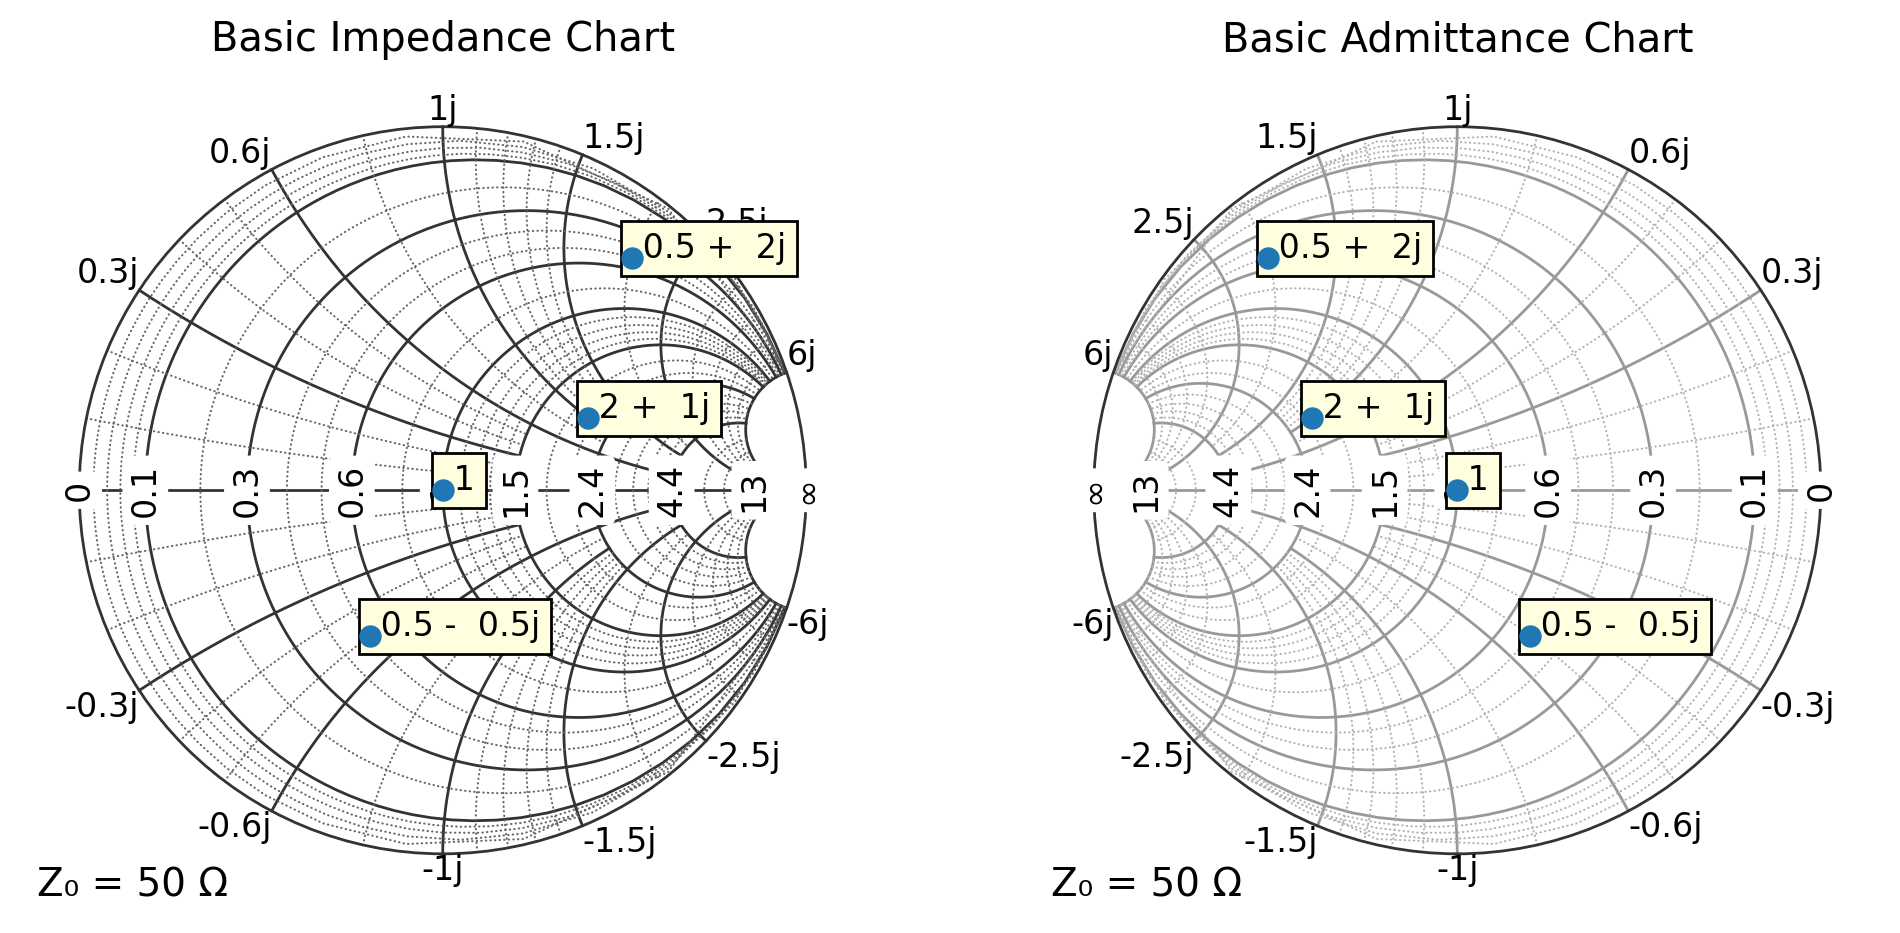

In [2]:
Z0 = 50
Y0 = 1 / Z0

norm_admittances = [
    0.5 + 2.0j,  # Moderate conductance and susceptance
    1.0 + 0.0j,  # Pure conductance (matched)
    0.5 - 0.5j,  # Capacitive (negative susceptance)
    2.0 + 1.0j,  # High conductance
]
admittances = np.array(norm_admittances) * Y0  # values in Siemens
impedances = np.array(norm_admittances) * Z0  # values in ohms

plt.figure(figsize=(12, 6))
ax = plt.subplot(121, projection="smith")
ax.scatter(impedances, s=50, domain=Z_DOMAIN)
for Z in impedances:
    ax.text(Z, utils.cs(Z / Z0, 2), domain=Z_DOMAIN, bbox=text_box)
ax.set_title("Basic Impedance Chart")

ax = plt.subplot(122, projection="smith", grid="admittance")
ax.scatter(admittances, s=50, domain=Y_DOMAIN)
for Y in admittances:
    ax.text(Y, utils.cs(Y / Y0, 2), domain=Y_DOMAIN, bbox=text_box)

ax.set_title("Basic Admittance Chart")

plt.show()

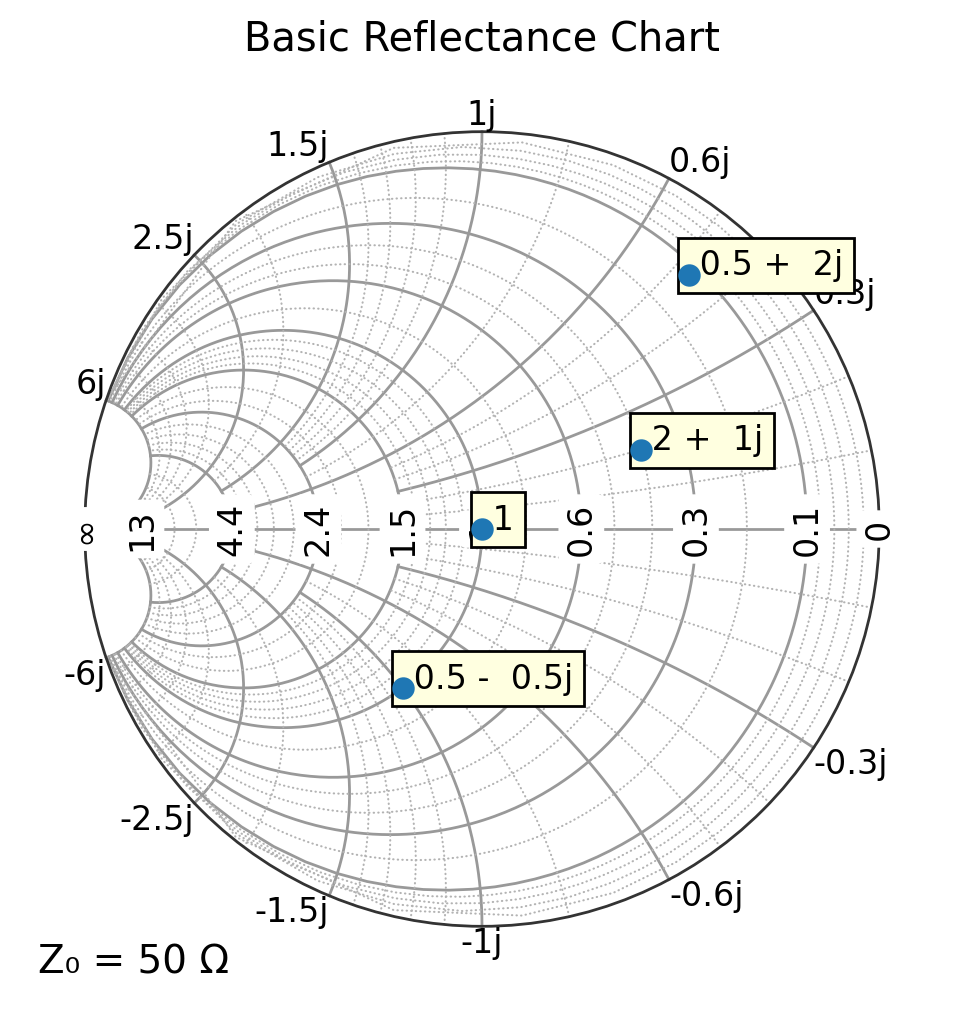

In [3]:
Z0 = 50
Y0 = 1 / Z0

gamma = [
    0.5 + 2.0j,  # Moderate conductance and susceptance
    1.0 + 0.0j,  # Pure conductance (matched)
    0.5 - 0.5j,  # Capacitive (negative susceptance)
    2.0 + 1.0j,  # High conductance
]

plt.figure(figsize=(6, 6))
ax = plt.subplot(111, projection="smith", domain=NORM_Z_DOMAIN, grid="admittance")
ax.scatter(gamma, s=50)
for g in gamma:
    ax.text(g, utils.cs(g, 2), bbox=text_box)
ax.set_title("Basic Reflectance Chart")

plt.show()

## 2. Admittance Chart with Minor Grid

Enable minor gridlines for more precise readings.

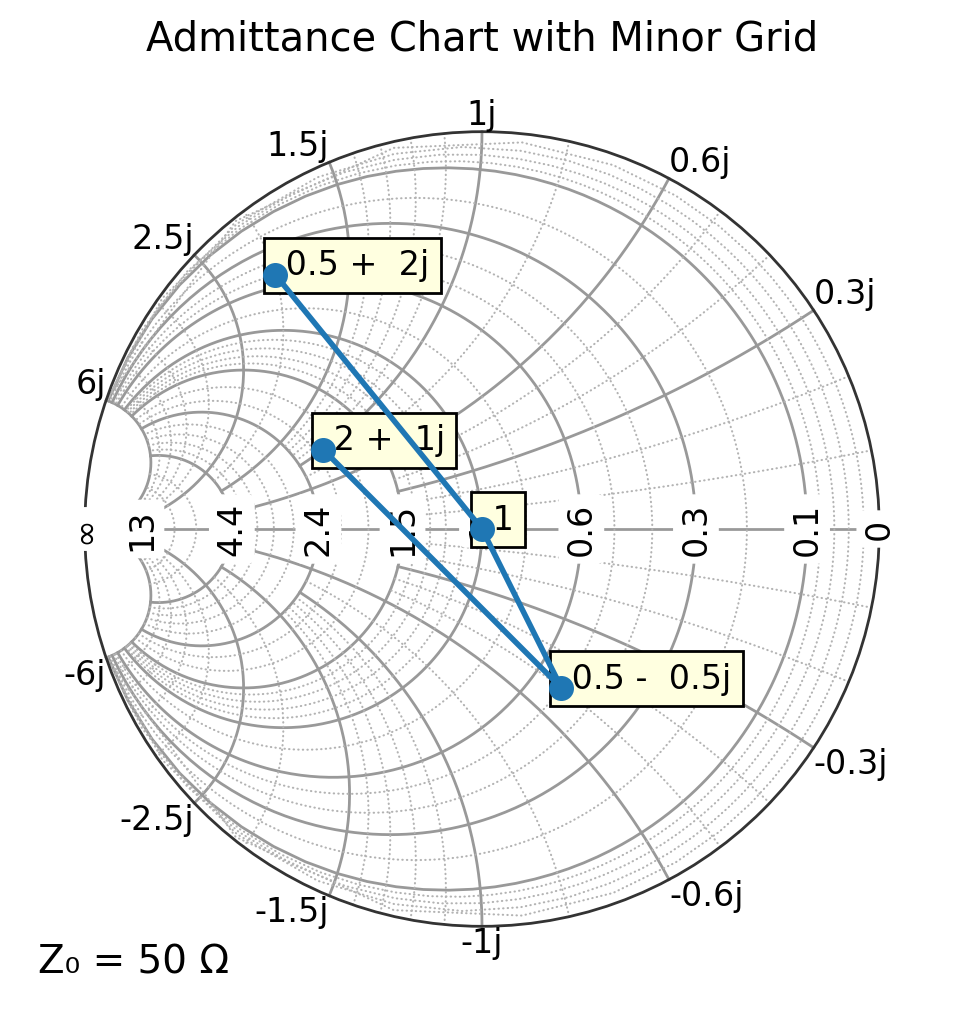

In [4]:
Z0 = 50
Y0 = 1 / Z0

norm_admittances = [
    0.5 + 2.0j,  # Moderate conductance and susceptance
    1.0 + 0.0j,  # Pure conductance (matched)
    0.5 - 0.5j,  # Capacitive (negative susceptance)
    2.0 + 1.0j,  # High conductance
]

plt.figure(figsize=(6, 6))
ax = plt.subplot(111, projection="smith", grid="admittance", domain=NORM_Y_DOMAIN)
ax.plot(norm_admittances, "o-", markersize=8)
for Y in norm_admittances:
    ax.text(Y, utils.cs(Y, 2), bbox=text_box)
ax.set_title("Admittance Chart with Minor Grid")
plt.show()

## 3. Fancy Mode (Adaptive Clipping)

Fancy mode adaptively clips gridlines based on visual thresholds for cleaner charts.

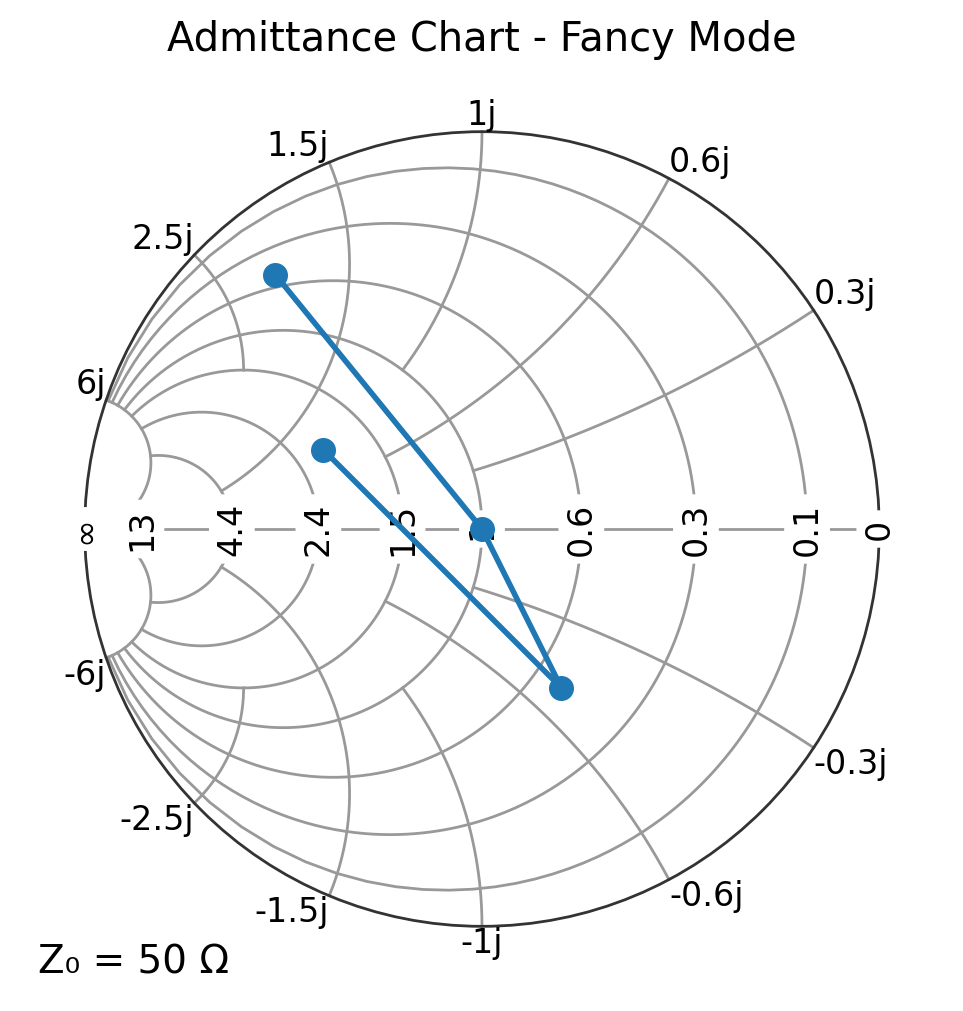

In [5]:
sc = {"grid.fancy": True, "grid.major.threshold": (200, 200), "grid.Y.minor.enable": False}
plt.figure(figsize=(6, 6))
ax = plt.subplot(111, projection="smith", grid="admittance", **sc)

ax.plot(admittances, "o-", markersize=8, domain=Y_DOMAIN, label="Admittance Path")
ax.set_title("Admittance Chart - Fancy Mode")
plt.show()

## 4. Fancy Mode with Minor Grid

Combining fancy mode with minor gridlines.

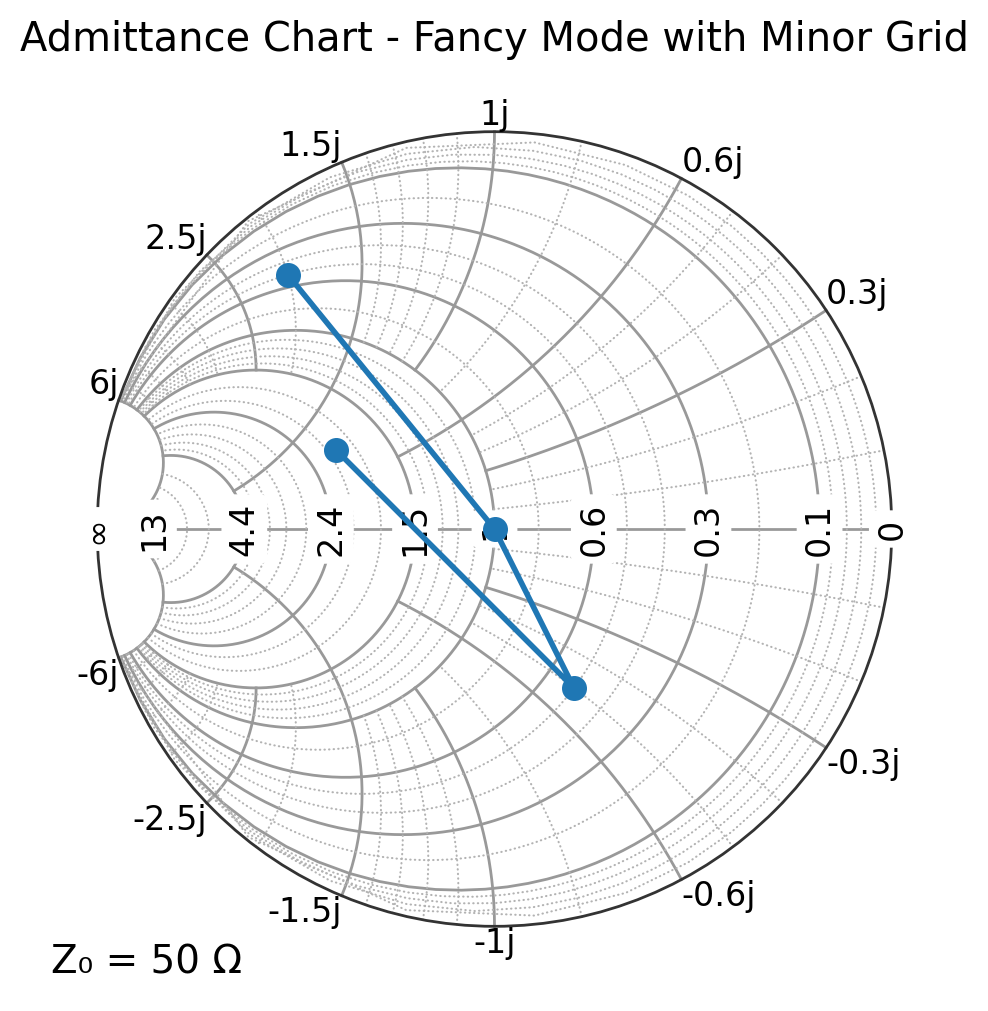

In [6]:
sc = {"grid.fancy": True, "grid.major.threshold": (200, 200)}
plt.figure(figsize=(6, 6))
ax = plt.subplot(111, projection="smith", grid="admittance", **sc)
ax.plot(admittances, "o-", markersize=8, domain=Y_DOMAIN, label="Admittance Path")
ax.set_title("Admittance Chart - Fancy Mode with Minor Grid")
plt.show()

## 5. Customized Admittance Grid Colors

Customize the appearance of the admittance grid.

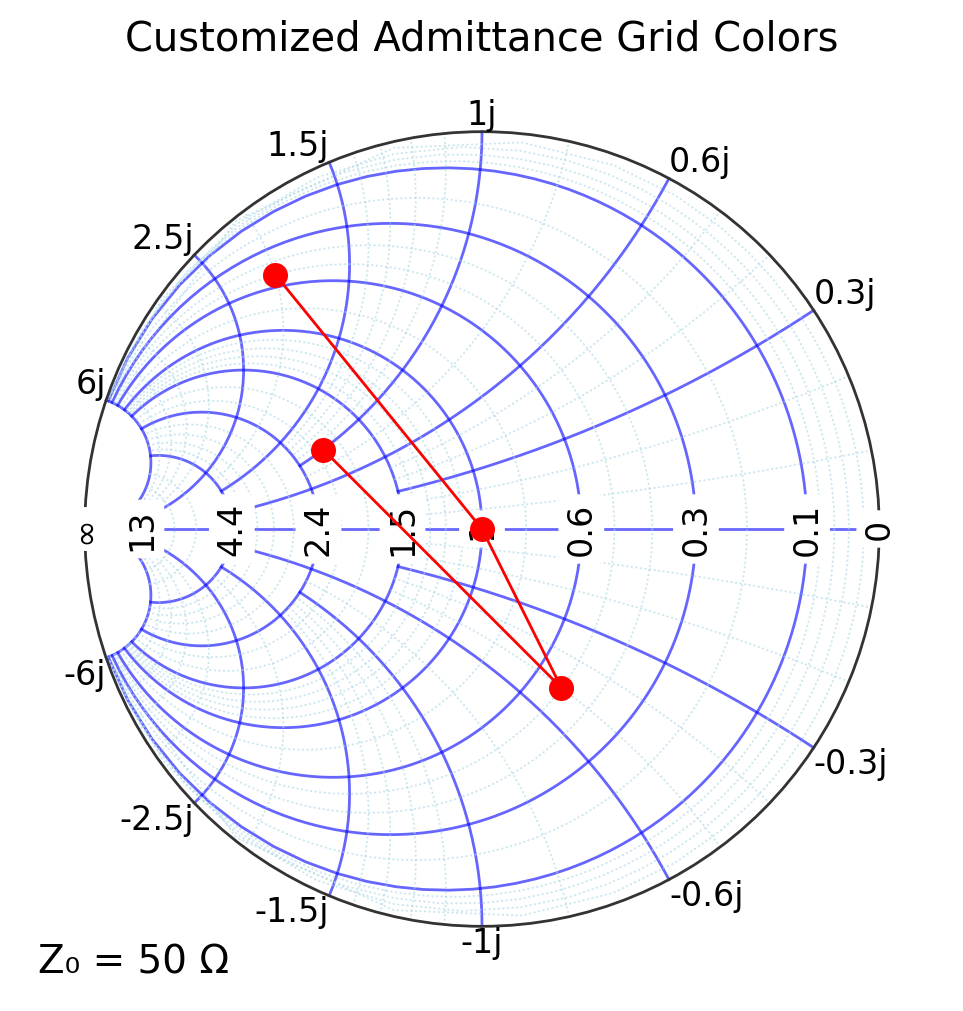

In [7]:
sc = {
    "grid.Y.major.color": "blue",
    "grid.Y.major.alpha": 0.6,
    "grid.Y.minor.color": "lightblue",
    "grid.Y.minor.alpha": 0.6,
}
plt.figure(figsize=(6, 6))
ax = plt.subplot(111, projection="smith", grid="admittance", **sc)

ax.plot(admittances, "ro-", markersize=8, linewidth=1, domain=Y_DOMAIN)
ax.set_title("Customized Admittance Grid Colors")
plt.show()

## 6. Dual Grid: Impedance + Admittance

Show both impedance and admittance grids simultaneously for comparison.

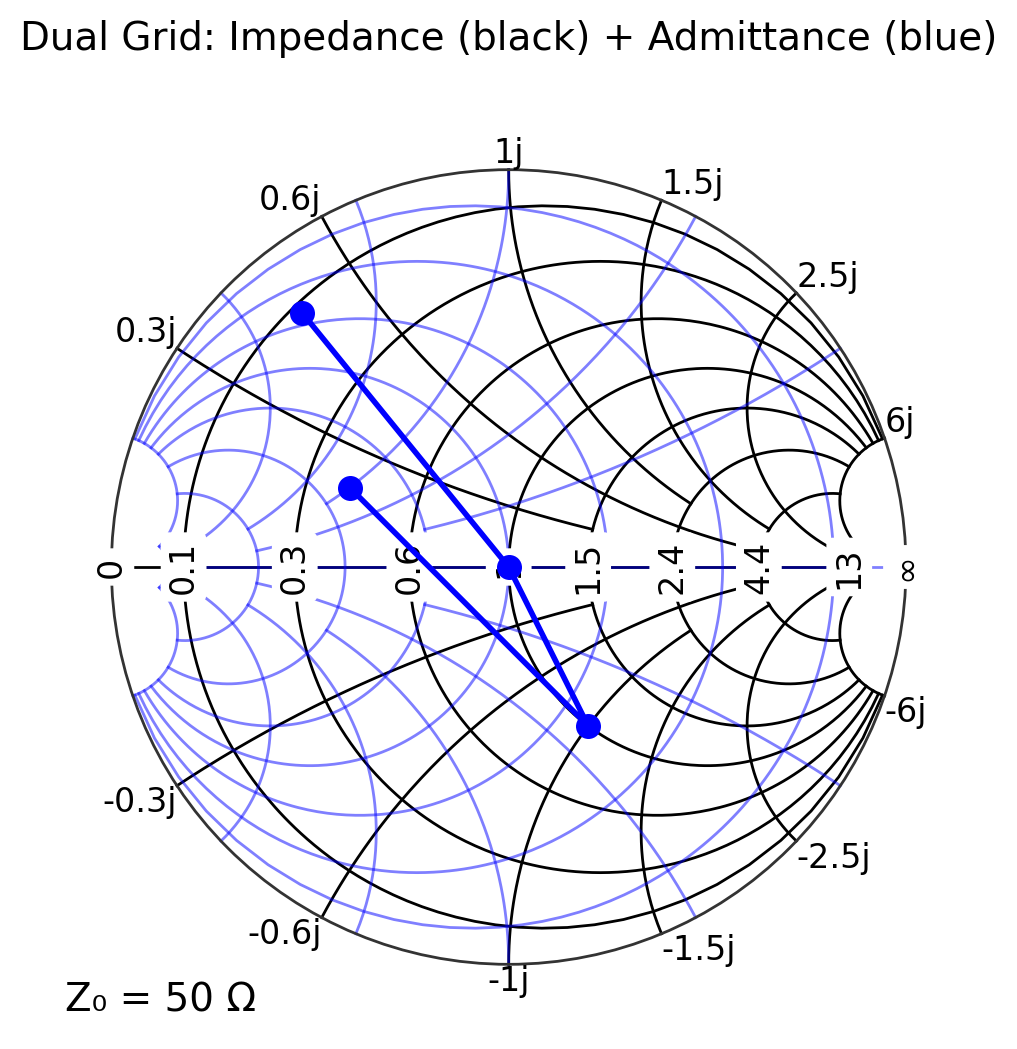

In [8]:
sc = {
    "grid.Z.major.color": "black",
    "grid.Z.major.alpha": 1.0,
    "grid.Z.minor.enable": False,
    "grid.Y.major.color": "blue",
    "grid.Y.major.alpha": 0.5,
    "grid.Y.minor.enable": False,
}
plt.figure(figsize=(6, 6))
ax = plt.subplot(111, projection="smith", grid="both", **sc)

ax.plot(admittances, "bo-", markersize=8, domain=Y_DOMAIN, label="Admittance")
ax.set_title("Dual Grid: Impedance (black) + Admittance (blue)", fontsize=14, pad=20)
plt.show()

## 7. Standard vs Fancy Mode Comparison

Side-by-side comparison of standard and fancy rendering modes.

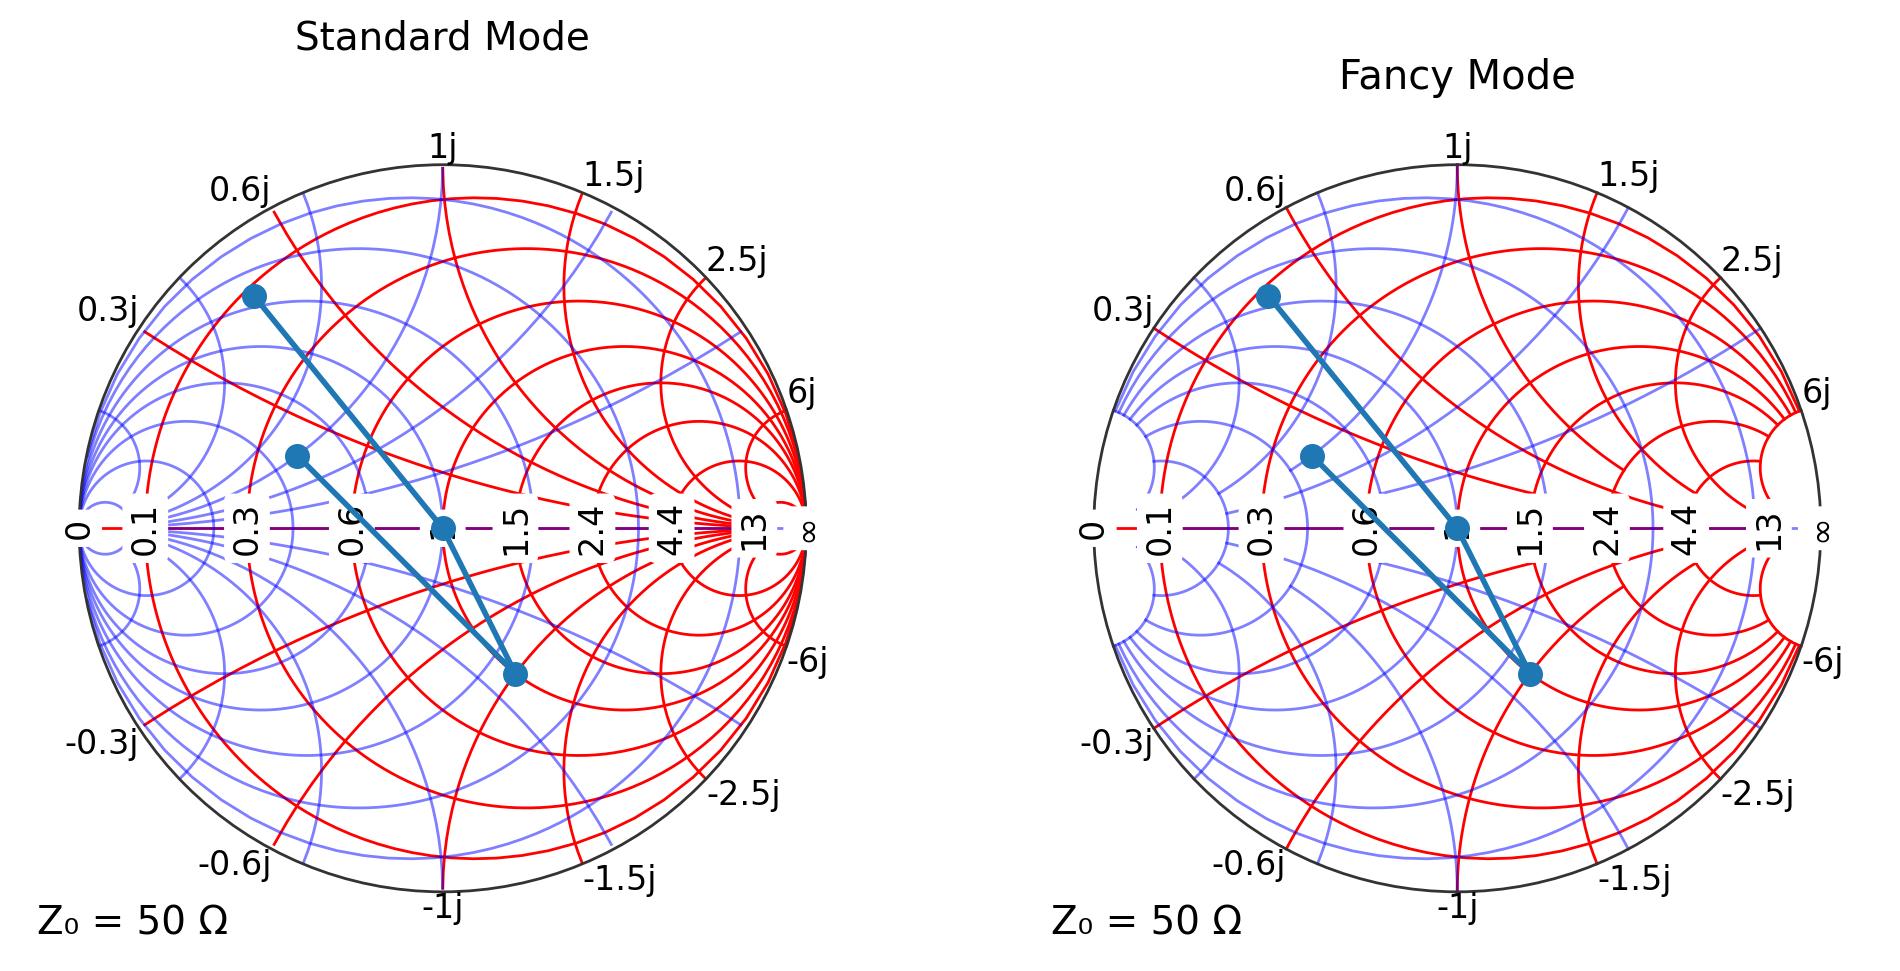

In [9]:
plt.figure(figsize=(12, 6))
sc = {
    "grid.fancy": False,
    "grid.Z.minor.enable": False,
    "grid.Y.minor.enable": False,
    "grid.Z.major.color": "red",
    "grid.Y.major.color": "blue",
    "grid.Z.major.alpha": 1.0,
    "grid.Y.major.alpha": 0.5,
}
ax = plt.subplot(121, projection="smith", grid="both", **sc)
ax.plot(admittances, "o-", markersize=8, domain=Y_DOMAIN)
ax.set_title("Standard Mode", fontsize=14, pad=20)

sc = {
    "grid.fancy": True,
    "grid.Z.minor.enable": False,
    "grid.Y.minor.enable": False,
    "grid.Z.major.color": "red",
    "grid.Y.major.color": "blue",
    "grid.Z.major.alpha": 1.0,
    "grid.Y.major.alpha": 0.5,
}
ax = plt.subplot(122, projection="smith", grid="both", **sc)
ax.plot(admittances, "o-", markersize=8, domain=Y_DOMAIN)
ax.set_title("Fancy Mode")
plt.show()

## 8. Different Division Settings

### Adjust the number of major divisions for conductance and susceptance.

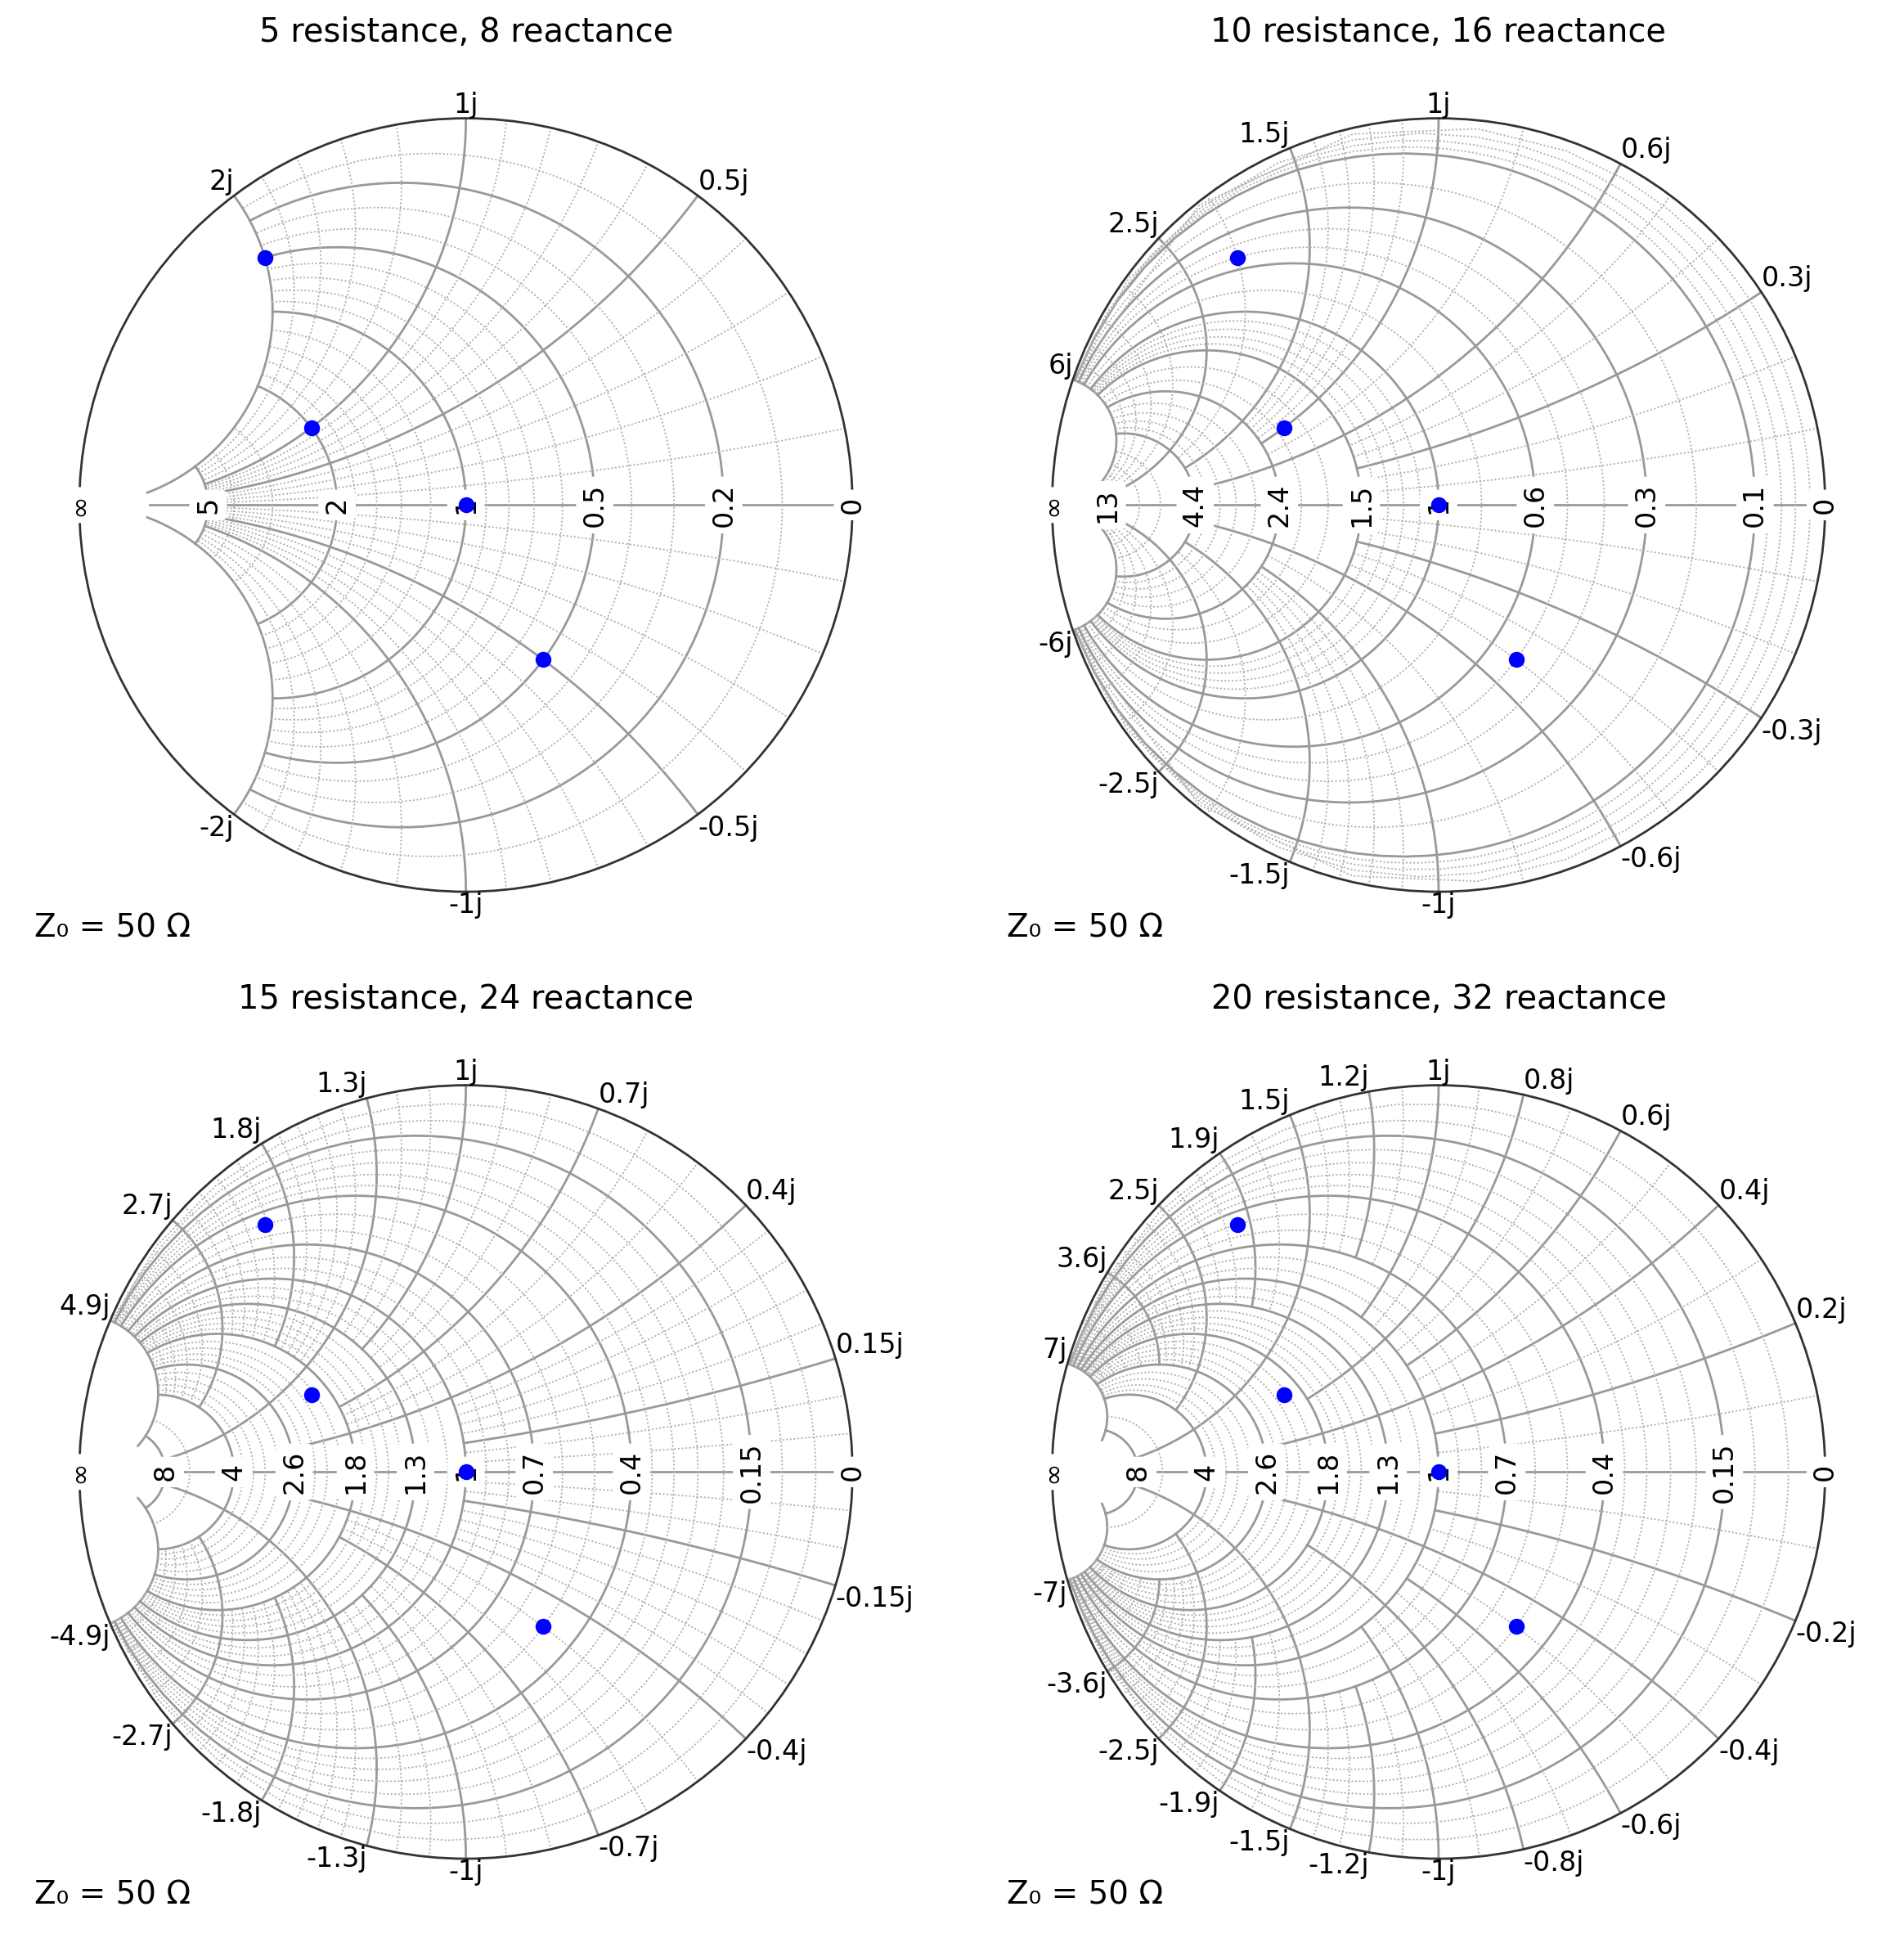

In [24]:
configs = [
    (5, 8, "Coarse (5, 18)"),
    (10, 16, "Default (10, 16)"),
    (15, 24, "Fine (15, 24)"),
    (20, 32, "Very Fine (20, 32)"),
]

plt.figure(figsize=(12, 12))

for i, c in enumerate(configs):
    real_div, imag_div, title = c
    sc = {"grid.Y.major.real.divisions": real_div, "grid.Y.major.imag.divisions": imag_div}
    ax = plt.subplot(2, 2, i + 1, projection="smith", grid="admittance", domain=Y_DOMAIN, **sc)
    ax.plot(admittances, "bo", markersize=6)
    ax.set_title("%d resistance, %d reactance" % (real_div, imag_div))

plt.tight_layout()
plt.show()

### Changing threshold for major divisions

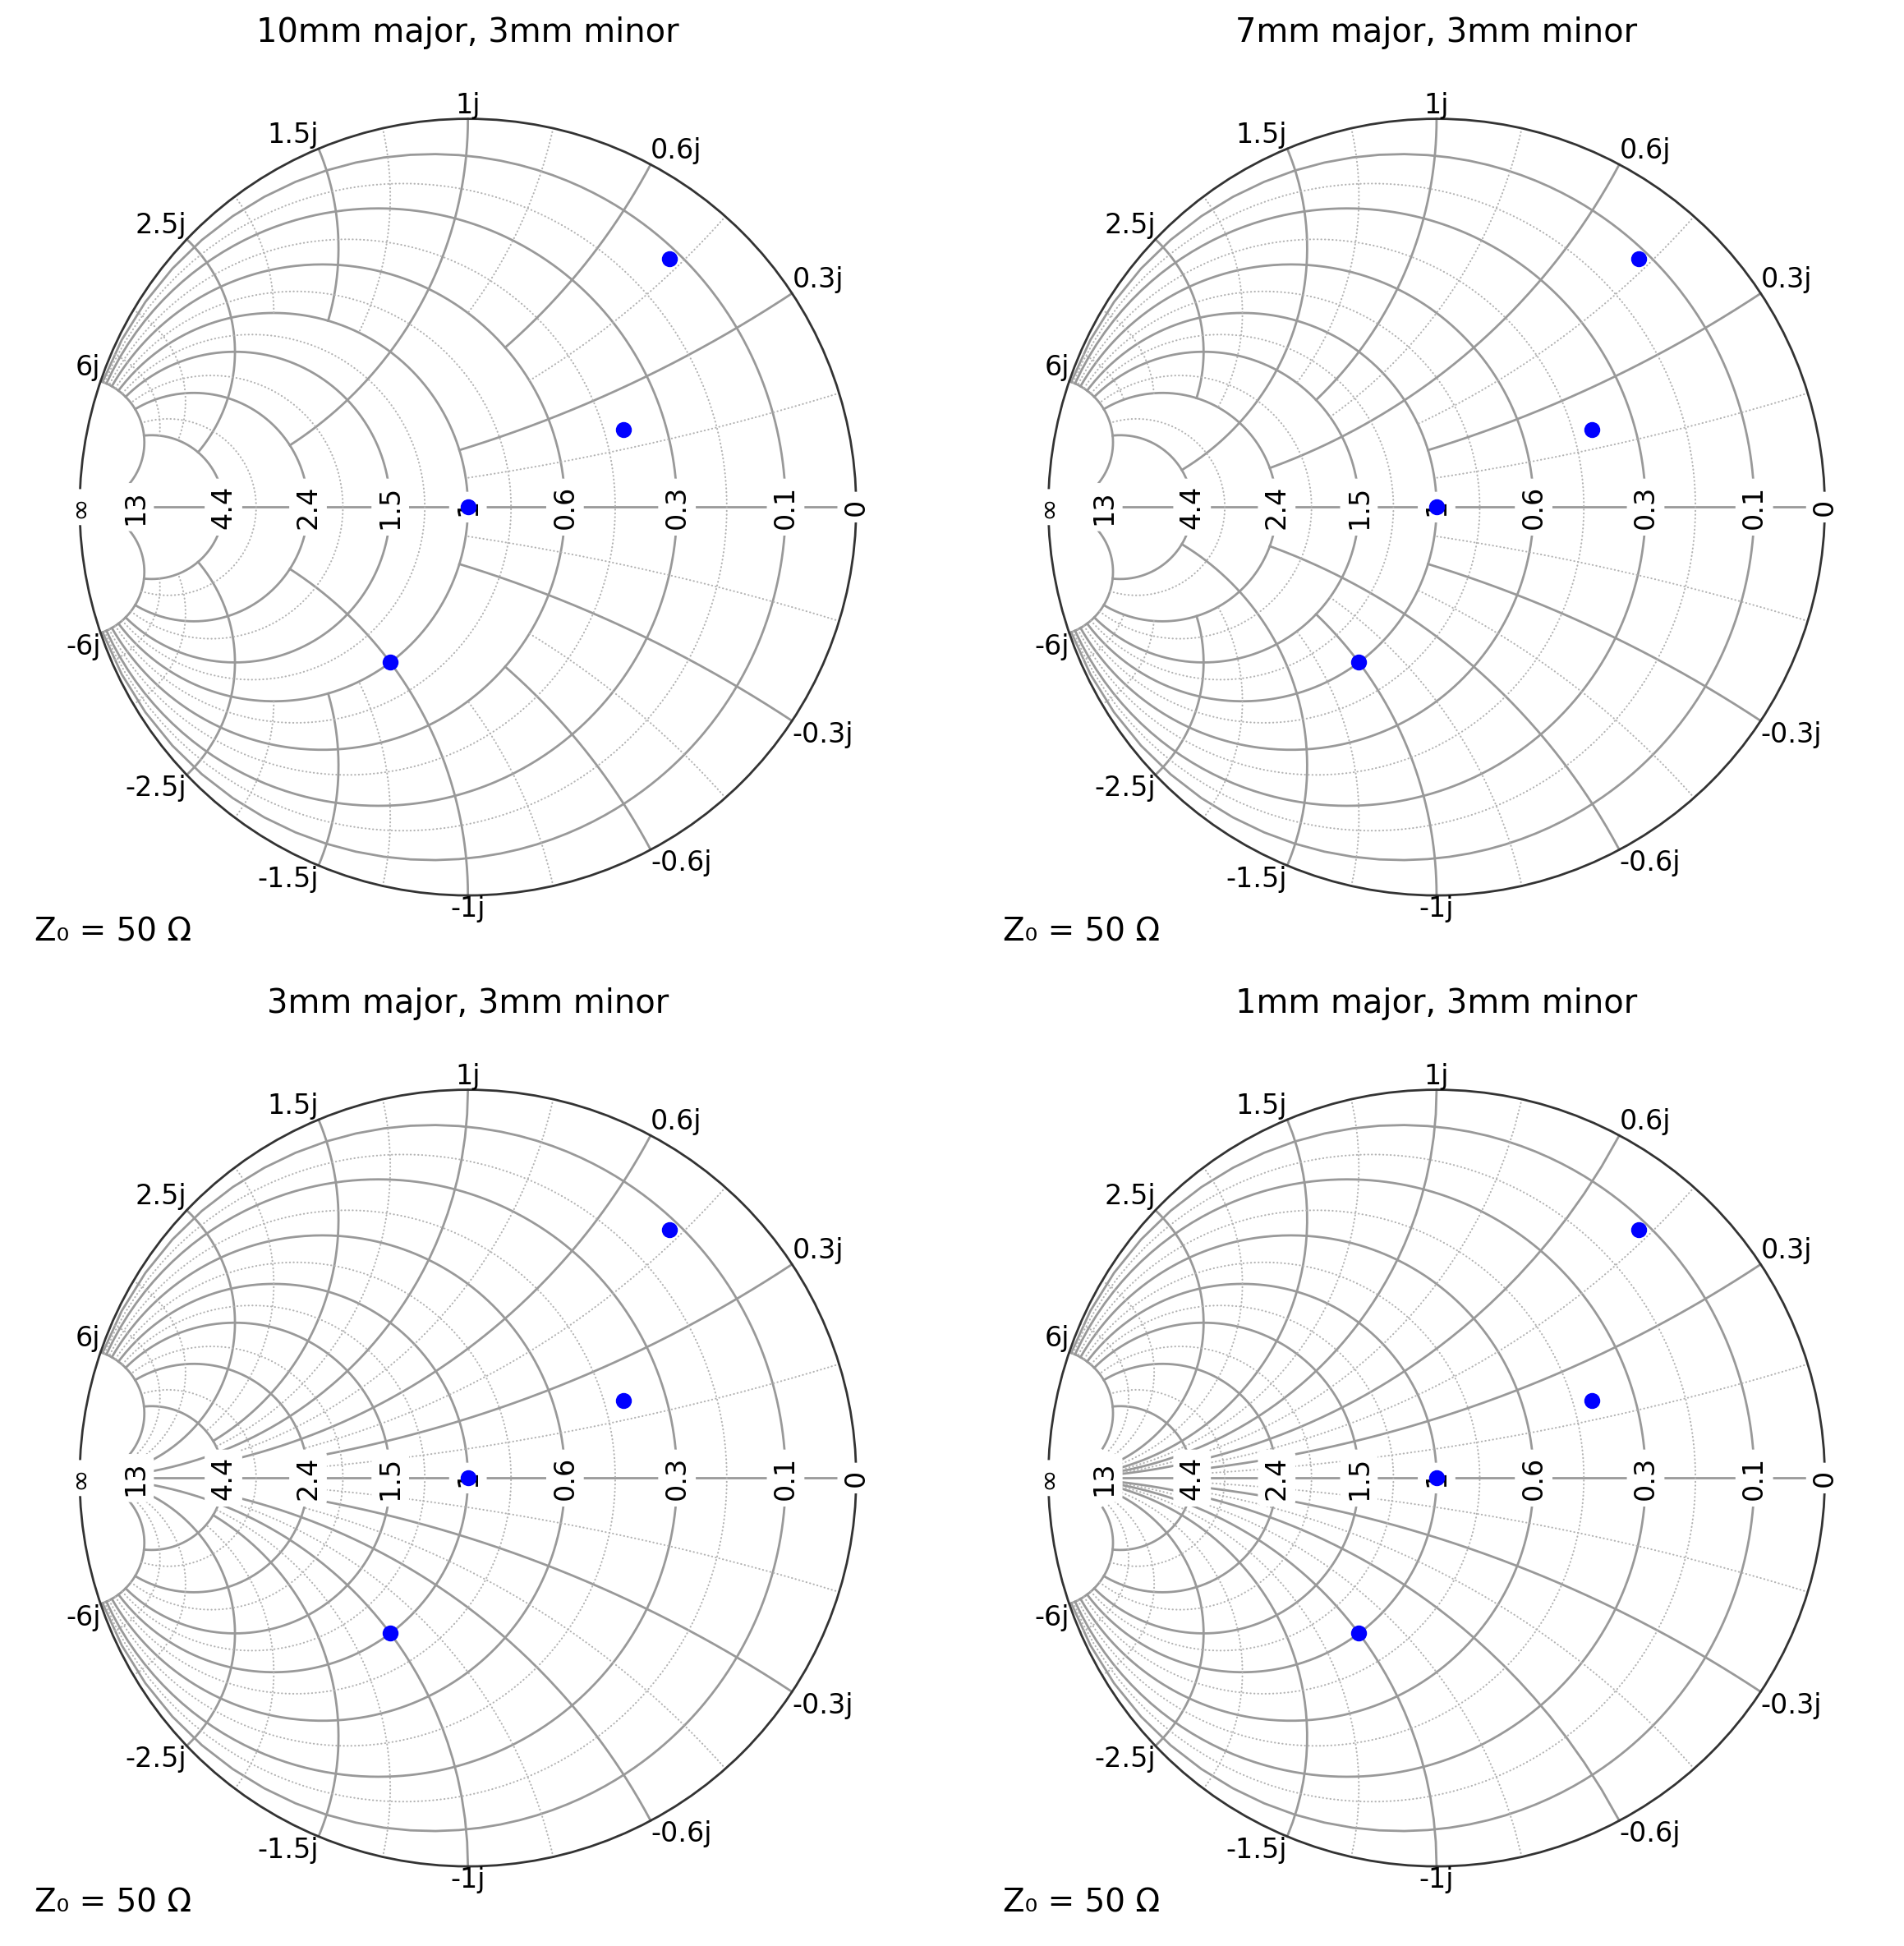

In [21]:
configs = [
    ("10mm", "3mm"),
    ("7mm", "3mm"),
    ("3mm", "3mm"),
    ("1mm", "3mm"),
]

plt.figure(figsize=(12, 12))

for i, c in enumerate(configs):
    major, minor = c
    sc = {"grid.major.threshold": major, "grid.minor.threshold": minor}
    ax = plt.subplot(2, 2, i + 1, projection="smith", grid="admittance", **sc)
    ax.plot(impedances, "bo", markersize=6)
    ax.set_title("%s major, %s minor" % (major, minor))

plt.tight_layout()
plt.show()

### Changing minor division threshold

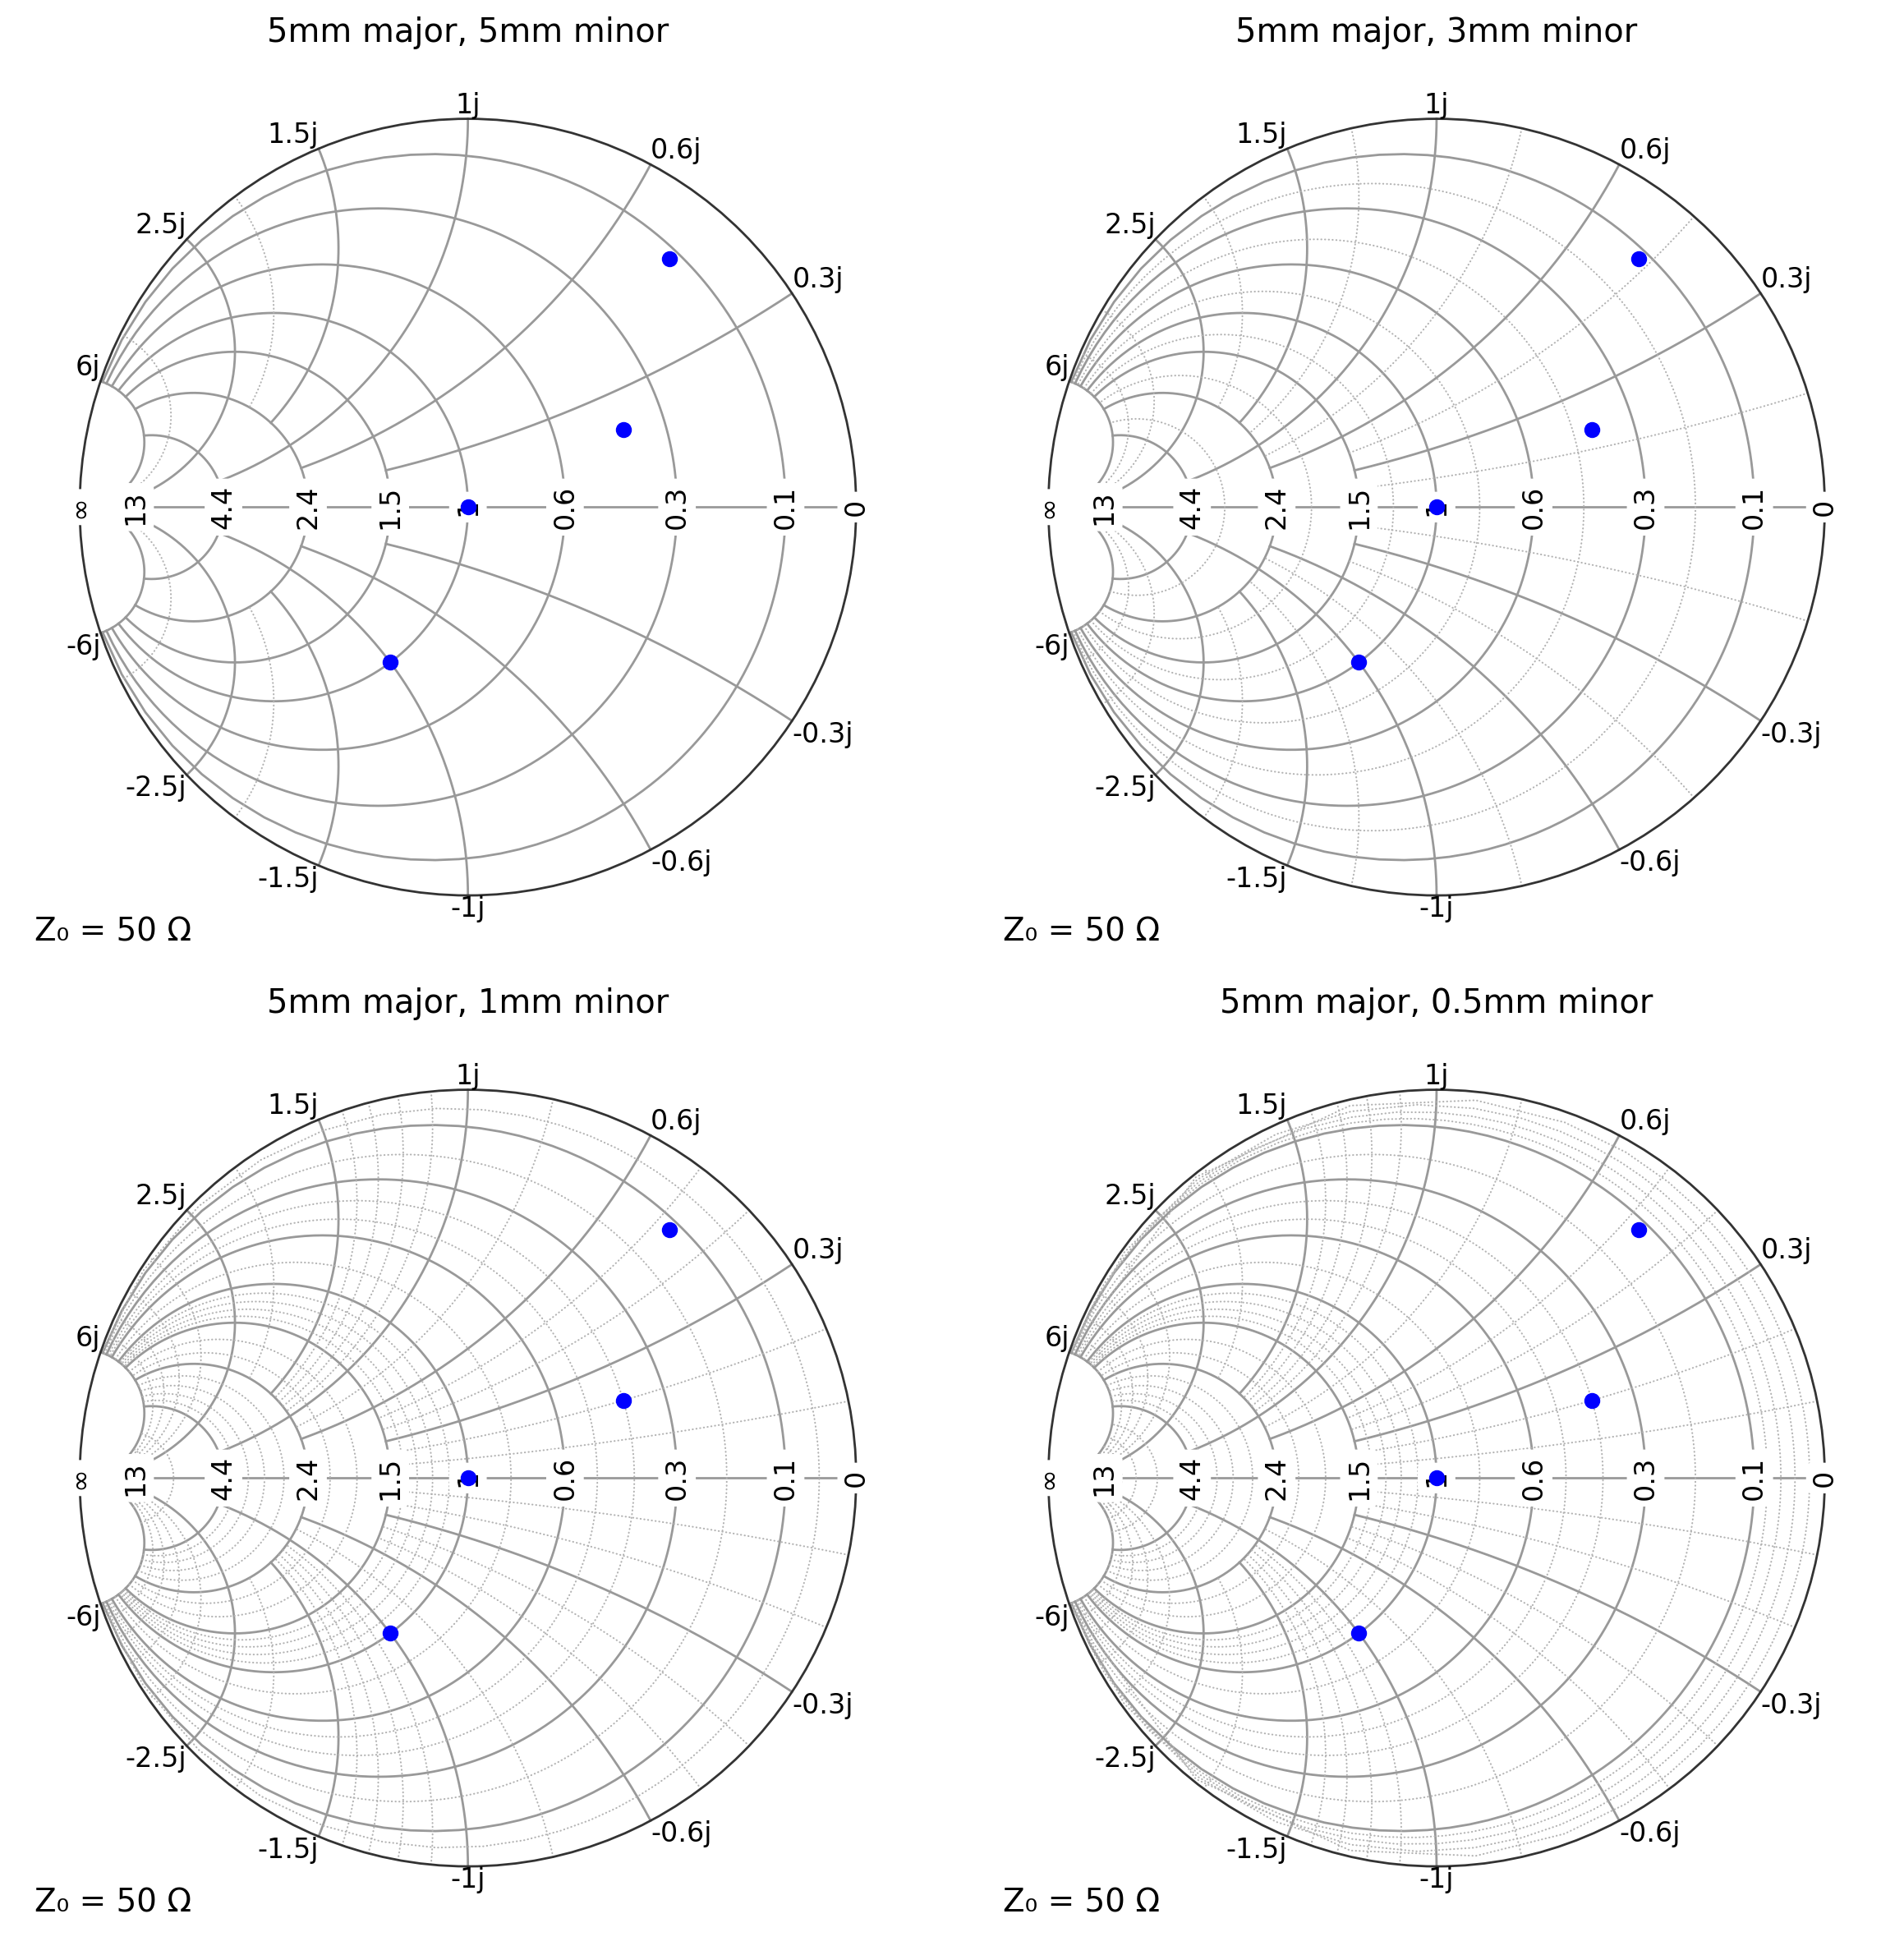

In [22]:
configs = [
    ("5mm", "5mm"),
    ("5mm", "3mm"),
    ("5mm", "1mm"),
    ("5mm", "0.5mm"),
]

plt.figure(figsize=(12, 12))

for i, c in enumerate(configs):
    major, minor = c
    sc = {"grid.major.threshold": major, "grid.minor.threshold": minor}
    ax = plt.subplot(2, 2, i + 1, projection="smith", grid="admittance", **sc)
    ax.plot(impedances, "bo", markersize=6)
    ax.set_title("%s major, %s minor" % (major, minor))

plt.tight_layout()
plt.show()

## 9. Practical Example: Parallel RC Circuit

Demonstrate a practical use case: analyzing a parallel RC circuit across frequency.

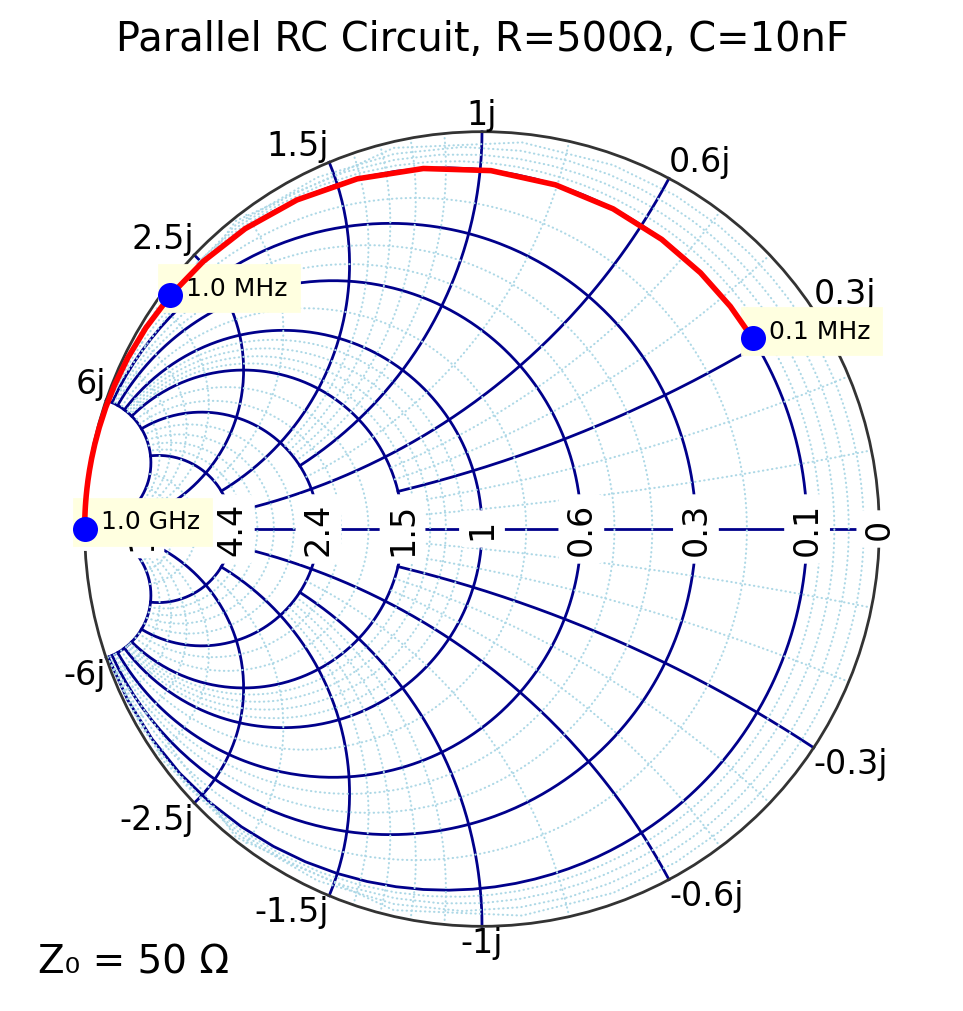


Circuit Parameters:
  R = 500 Ω
  C = 10000.0 pF
  Z₀ = 50 Ω

Normalized Admittance Range:
  Y/Y₀ at 1 MHz:   0.002+0.006j
  Y/Y₀ at 1 GHz:   0.002+62.832j


In [25]:
def parallel(Z1, Z2):
    return Z1 * Z2 / (Z1 + Z2)


R = 500  # Resistance in ohms
C = 10e-9  # Capacitance in farads
Z0 = 50  # System impedance

# Frequency sweep
f = np.logspace(5, 9, 50)  # 1 MHz to 1 GHz
omega = 2 * np.pi * f

# Calculate admittance: Y = 1/R + jωC
Z = parallel(R, 1 / (1j * omega * C))
Y = 1 / Z
G = Z.real
B = Z.imag

plt.figure(figsize=(6, 6))
sc = {
    "grid.fancy": True,
    "grid.Y.major.color": "darkblue",
    "grid.Y.minor.color": "lightblue",
}
ax = plt.subplot(111, projection="smith", grid="admittance", **sc)

ax.plot(Y, "r-", lw=2, domain=Y_DOMAIN)

text_box = {"facecolor": "lightyellow", "edgecolor": "lightyellow"}
marker_freqs = [1e5, 1e6, 1e9]
for freq in marker_freqs:
    idx = np.argmin(np.abs(f - freq))
    ax.plot(Y[idx], "bo", markersize=8, domain=Y_DOMAIN)

    freq_label = f"{freq/1e6:.1f} MHz" if freq < 1e9 else f"{freq/1e9:.1f} GHz"
    ax.text(Y[idx], f"  {freq_label}", fontsize=9, domain=Y_DOMAIN, bbox=text_box)

ax.set_title(f"Parallel RC Circuit, R={R}Ω, C={C*1e9:.0f}nF")
plt.show()

print(f"\nCircuit Parameters:")
print(f"  R = {R} Ω")
print(f"  C = {C*1e12:.1f} pF")
print(f"  Z₀ = {Z0} Ω")
print(f"\nNormalized Admittance Range:")
print(f"  Y/Y₀ at 1 MHz:   {Y[0]:.3f}")
print(f"  Y/Y₀ at 1 GHz:   {Y[-1]:.3f}")